In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
#Checking working directory
os.getcwd()

'D:\\Learning\\USF - Data Science Programming\\Assignment 2'

In [50]:
#Recreating the merged dataframe from Assignment 1
df = pd.read_csv("dengue_features_train.csv")
df_rn = df.copy()
df_rn.columns = df_rn.columns.str.replace('station', 'stn')
df_rn.columns = df_rn.columns.str.replace('precip', 'prec')
df_rn.columns = df_rn.columns.str.replace('humidity', 'hd')
df_rn.columns = df_rn.columns.str.replace('reanalysis', 're_an')
df_rn.year = df_rn.year.astype('category')
df_pred = pd.read_csv("dengue_labels_train.csv")
df_merged = pd.merge(df_rn, df_pred, on=['city','year','weekofyear'], how='outer')
df_merged = df_merged.fillna(method='ffill')

In [108]:
#Creating a copy of the dataframe to work on 
df_copy = df_merged.copy()

In [109]:
#Changing types of 'city' and 'weekstartdate' for further computations
df_copy['city'] = df_copy['city'].astype('category')
df_copy['week_start_date'] = df_copy['week_start_date'].astype('datetime64[ns]')

In [110]:
#Extracting month from 'weekstartdate' and dropping the variable
df_copy['month'] = df_copy['week_start_date'].dt.month
df_copy = df_copy.drop(['week_start_date'], axis = 1)

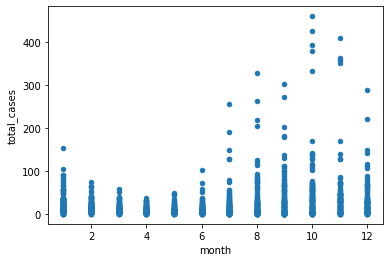

In [111]:
#Checking for correlation between months of the year and the target variable
df_copy.plot.scatter(x = "month",
                    y = "total_cases")

In [54]:
#Verifying if the changes to types have been effected
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   city                        1456 non-null   category
 1   year                        1456 non-null   int64   
 2   weekofyear                  1456 non-null   int64   
 3   ndvi_ne                     1456 non-null   float64 
 4   ndvi_nw                     1456 non-null   float64 
 5   ndvi_se                     1456 non-null   float64 
 6   ndvi_sw                     1456 non-null   float64 
 7   precitation_amt_mm          1456 non-null   float64 
 8   re_an_air_temp_k            1456 non-null   float64 
 9   re_an_avg_temp_k            1456 non-null   float64 
 10  re_an_dew_point_temp_k      1456 non-null   float64 
 11  re_an_max_air_temp_k        1456 non-null   float64 
 12  re_an_min_air_temp_k        1456 non-null   float64 
 13  re_an_prec_amt_kg_

In [80]:
#Copying the names of all columns to a list
cols = df_copy.columns.to_list()

In [65]:
#Rearranging the column indexes to make the split into X,y easier
cols = cols[-2:] + cols[:-2]

In [104]:
#Trying to convert the month into a cyclical variable 
#https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes
df_copy["month_sin"] = np.sin((df_copy.month-1)*(2.*np.pi/12))
df_copy["month_cos"] = np.cos((df_copy.month-1)*(2.*np.pi/12))

AttributeError: 'DataFrame' object has no attribute 'month'

In [57]:
#Dropping month variable since it is now cyclically converted
df_copy = df_copy.drop(['month'], axis = 1)

In [58]:
#Dropping the 'weekofyear' variable
df_copy = df_copy.drop(['weekofyear'], axis = 1)

In [105]:
#Storing all the categorical and numerical variables in two separate lists for encoding & standardizing respectively
cat_cols = ["city", "year"]
num_cols = ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw", "precitation_amt_mm", "re_an_air_temp_k",
           "re_an_avg_temp_k",
           "re_an_dew_point_temp_k",
           "re_an_max_air_temp_k",
           "re_an_min_air_temp_k",
           "re_an_prec_amt_kg_per_m2",
           "re_an_relative_hd_percent",
           "re_an_sat_prec_amt_mm",
           "re_an_specific_hd_g_per_kg",
           "re_an_tdtr_k",
           "stn_avg_temp_c",
           "stn_diur_temp_rng_c",
           "stn_max_temp_c",
           "stn_min_temp_c",
           "stn_prec_mm",
           "month_sin",
           "month_cos"]

print(cat_cols)
print(num_cols)

['city', 'year']
['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precitation_amt_mm', 're_an_air_temp_k', 're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k', 're_an_min_air_temp_k', 're_an_prec_amt_kg_per_m2', 're_an_relative_hd_percent', 're_an_sat_prec_amt_mm', 're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c', 'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c', 'stn_prec_mm', 'month_sin', 'month_cos']


In [60]:
#Storing the target variable 'total cases' in y
y = df_copy["total_cases"]

In [66]:
#Storing all the columns of modified 'merged' dataframe in X
X = df_copy[cols]

In [70]:
#Removing the target column from the 'X' dataframe
X = X.iloc[:,:24]

In [81]:
#Verifying if the operations have been performed correctly
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   month_sin                   1456 non-null   float64 
 1   month_cos                   1456 non-null   float64 
 2   city                        1456 non-null   category
 3   year                        1456 non-null   int64   
 4   ndvi_ne                     1456 non-null   float64 
 5   ndvi_nw                     1456 non-null   float64 
 6   ndvi_se                     1456 non-null   float64 
 7   ndvi_sw                     1456 non-null   float64 
 8   precitation_amt_mm          1456 non-null   float64 
 9   re_an_air_temp_k            1456 non-null   float64 
 10  re_an_avg_temp_k            1456 non-null   float64 
 11  re_an_dew_point_temp_k      1456 non-null   float64 
 12  re_an_max_air_temp_k        1456 non-null   float64 
 13  re_an_min_air_temp

In [83]:
#Creating a 80:20 stratified train-test split based on the City 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = X["city"], test_size = 0.2, random_state = 42, shuffle = True)

In [88]:
#Importing the StandardScaler and OneHotEncoder for pre-processing the numerical & categorical variables respectively
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ohe = OneHotEncoder(sparse=False)

#Transforming the training data
X_tr_scaled_cols = ss.fit_transform(X_train[num_cols])
X_tr_encoded_cols = ohe.fit_transform(X_train[cat_cols])

In [101]:
#Transforming the test data
X_test_scaled_cols = ss.transform(X_test[num_cols])
X_test_encoded_cols = ohe.transform(X_test[cat_cols])

In [97]:
#Concatenating the numerical & categorical variables in the training set
X_tr_scaled = np.concatenate([X_tr_scaled_cols, X_tr_encoded_cols], axis = 1)

In [102]:
#Concatenating the numerical & categorical variables in the test set
X_test_scaled = np.concatenate([X_test_scaled_cols, X_test_encoded_cols], axis = 1)

In [147]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=42, max_iter=10000, penalty=None, tol=1e-3)

In [140]:
sgd_reg.fit(X_tr_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [141]:
sgd_reg.intercept_, sgd_reg.coef_

(array([16.72081643]),
 array([ -4.10186122,   1.80131567,  -7.66304385,   7.18373393,
         -0.10189045,   4.3017746 ,  -6.17573048,   1.62993122,
         -2.38182903,  -5.6051548 ,  -1.35486251,  -0.0846033 ,
         -0.10189045,   3.42756159,  -0.49032455,   7.25943078,
         -6.9507036 ,   3.03578045,  -2.91627902,  -0.65242032,
        -13.11735453,   5.27159607,   1.37342703,  15.3473894 ,
        -10.66633171,  17.40723259,   9.17231634, -11.80630507,
         79.30011541,  -7.54187308, -16.06775028,  -4.92894308,
         58.69214416,   0.21933714, -13.07352263, -10.01852014,
        -12.05596668, -15.29085065, -13.9316697 ,  -4.43996798,
        -13.19544471,  -1.43793834,  -3.30631103, -10.136714  ,
         -0.17222013]))

In [142]:
y_predict = sgd_reg.predict(X_tr_scaled)

In [143]:
y_predict[:10]

array([  4.30637182,  27.22295717,   5.0631674 ,   6.20759063,
        13.02461171, -27.87889509,  16.6885366 ,  46.91928343,
        23.10765154, 104.80107845])

In [144]:
y_train[:10]

1449     7
295     23
571      6
306      4
823      7
1247     0
962      0
382     47
1130     3
437     80
Name: total_cases, dtype: int64

In [145]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_predict)
mse

947.5613636988219

In [146]:
np.sqrt(mse)

30.782484690141924